In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import explore

In [2]:
#df = explore.make_initial_df()
#df = explore.add_new_columns(df)
#df.head()

In [3]:
#df.to_csv('prepared_df.csv')
df = pd.read_csv('prepared_df.csv')

In [4]:
word_counts_df = explore.make_word_counts_df(df)
word_counts_df.head()

,all,python,javascript,jupyter,c_plus,typescript,java,other
0,537,348,88,15,59,3,4,20
00,30,0,0,30,0,0,0,0
000,2,2,0,0,0,0,0,0
0000,7,1,0,3,2,0,0,1
000000,2,0,0,2,0,0,0,0


In [5]:
vectorized_df = explore.make_vectorized_df(df)
vectorized_df.head()

,00,000,0000,000000,00008100,0001twosumproblems1twosumenmd,0002,0003,0004732,0004medianoftwosortedarrayproblems4medianoftwosortedarraymd,...,zxf,zxvf,zynga,zyszyshttpsgithubcomzyszys,num_words,num_unique_words,link_counts,py_extensions,js_extensions,ipynb_extensions
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76,52,76,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43,36,17,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1718,593,7,0,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,443,293,29,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,364,235,55,0,0,0


In [6]:
vectorized_df.shape

(298, 41840)

In [7]:
# Write all words to a text file for later use
all_words = vectorized_df.columns.tolist()

with open("all_words.txt", 'w') as output:
    for row in all_words:
        output.write(str(row) + '\n')

In [9]:
# these columns come from a later step, 
# when we restrict the df to only those words which have a median importance of > 0.05
# but we need to scale these columns AFTER aggregation, so we will do this step before scaling

def aggregate_columns(df):
    df['numbers'] = df['10'] + df['100'] + df['36']
    df['add+'] = df['add'] + df['additional']
    df['build+'] = df['build'] + df['building'] + df['built']
    df['contribute+'] = df['contribute'] + df['contributing'] + df['contributor']
    df['create+'] = df['create'] + df['created'] + df['creating']
    df['design+'] = df['design'] + df['designed']
    df['developed+'] = df['developed'] + df['developer'] + df['development']
    df['distributed+'] = df['distributed'] + df['distribution']
    df['follow+'] = df['follow'] + df['following']
    df['get+'] = df['get'] + df['getting']
    df['git+'] = df['git'] + df['github']
    df['install+'] = df['install'] + df['installation'] + df['installed'] + df['installing']
    df['provide+'] = df['provided'] + df['provides']
    df['recommend+'] = df['recommend'] + df['recommended']
    df['release+'] = df['release'] + df['released']
    df['require+'] = df['required'] + df['requirement'] + df['requires']
    df['run+'] = df['run'] + df['running']
    df['start+'] = df['start'] + df['started']
    df['support+'] = df['support'] + df['supported']
    df['use+'] = df['usage'] + df['use'] + df['used'] + df['useful'] + df['using']
    df['work+'] = df['work'] + df['working']

    replaced_columns = ['10', '100', '36', 'add', 'additional', 'build', 'building', 'built',
                        'contribute', 'contributing', 'contributor', 'create', 'created', 
                        'creating', 'design', 'designed', 'developed', 'developer', 'development', 
                        'distributed', 'distribution', 'follow', 'following', 'get', 'getting', 
                        'git', 'github', 'install', 'installation', 'installed', 'installing', 
                        'provided', 'provides', 'recommend', 'recommended', 'release', 'released',  
                        'required', 'requirement', 'requires', 'run', 'running', 'start', 'started', 
                        'support', 'supported', 'usage', 'use', 'used', 'useful', 'using', 'work', 'working']

    df = df.drop(labels=replaced_columns, axis=1)
    
    df['politeness'] = (df['please'] + df['thank'] + df['thankful'] 
                        + df['thanks'] + df['thanksspecialthanksto']
                        + df['thanksthanks'] + df['grateful'] 
                        + df['gratefully'] + df['gratitude'])
    
    return df

vectorized_df = aggregate_columns(vectorized_df)

In [10]:
# test prep_vectorized_df function from explore
X_train_reduced, X_test_reduced = explore.prep_vectorized_df(df, vectorized_df)

In [11]:
X_train_reduced.shape, X_test_reduced.shape

((208, 202), (90, 202))

In [12]:
X_train_reduced.columns.tolist()

['already',
 'also',
 'alternatively',
 'analysis',
 'api',
 'application',
 'author',
 'available',
 'based',
 'basic',
 'best',
 'box',
 'bug',
 'called',
 'case',
 'cd',
 'change',
 'check',
 'clone',
 'code',
 'come',
 'command',
 'common',
 'community',
 'complete',
 'complex',
 'contains',
 'core',
 'could',
 'current',
 'data',
 'deep',
 'dependency',
 'detail',
 'different',
 'directory',
 'documentation',
 'dont',
 'download',
 'easily',
 'easy',
 'eg',
 'either',
 'enable',
 'environment',
 'etc',
 'even',
 'example',
 'fast',
 'feature',
 'feel',
 'file',
 'first',
 'form',
 'found',
 'free',
 'fully',
 'generate',
 'give',
 'group',
 'ha',
 'handle',
 'help',
 'however',
 'html',
 'image',
 'import',
 'including',
 'information',
 'input',
 'instead',
 'integration',
 'interactive',
 'interested',
 'introduction',
 'issue',
 'join',
 'jupyter',
 'know',
 'language',
 'large',
 'last',
 'latest',
 'learning',
 'let',
 'license',
 'like',
 'line',
 'list',
 'loading',
 'look'

### Investigate the distribution of variables

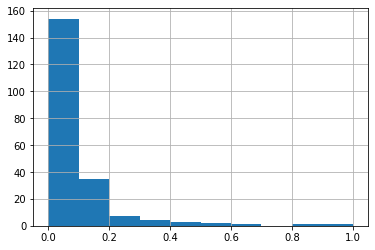

In [13]:
X_train_reduced.num_words.hist()

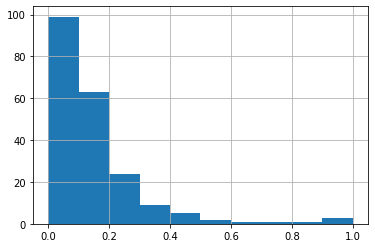

In [14]:
X_train_reduced.num_unique_words.hist()

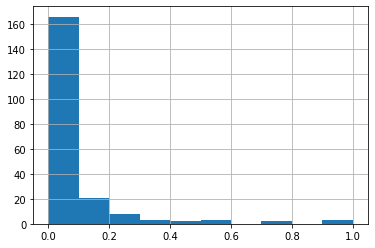

In [15]:
X_train_reduced.link_counts.hist()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:282: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


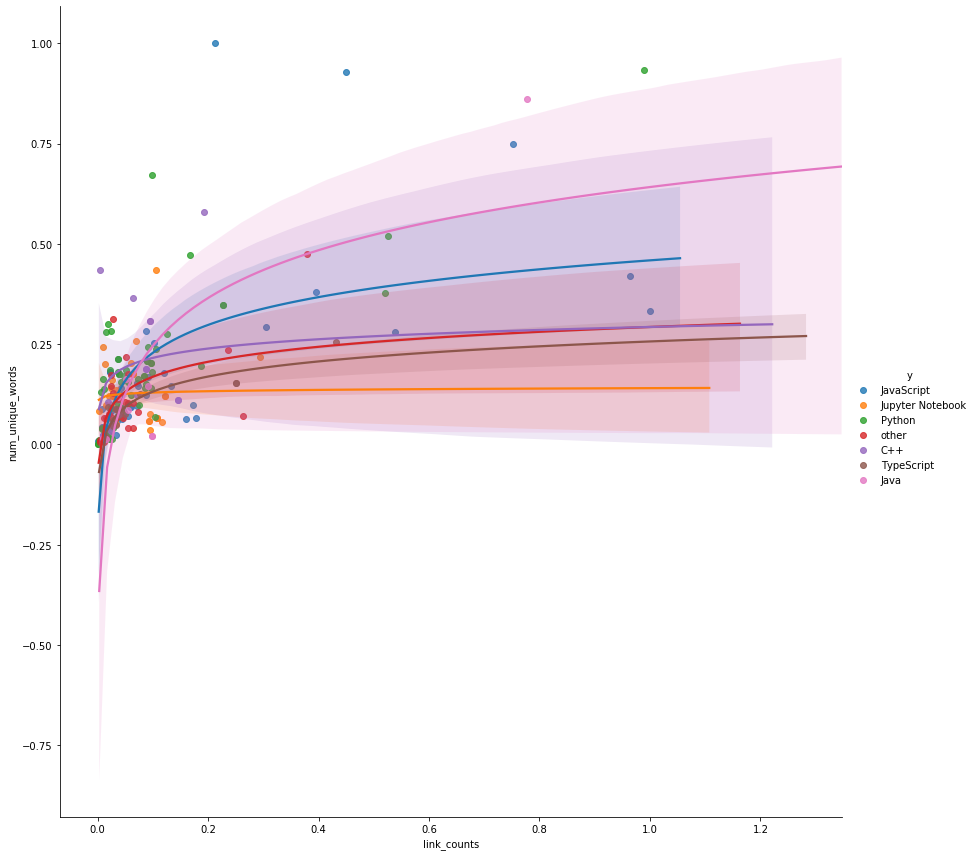

In [16]:
# add y back in to see how the language affects relationships in variables
X_train_reduced['y'] = df.gen_language
sns.lmplot(x='link_counts', y='num_unique_words', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

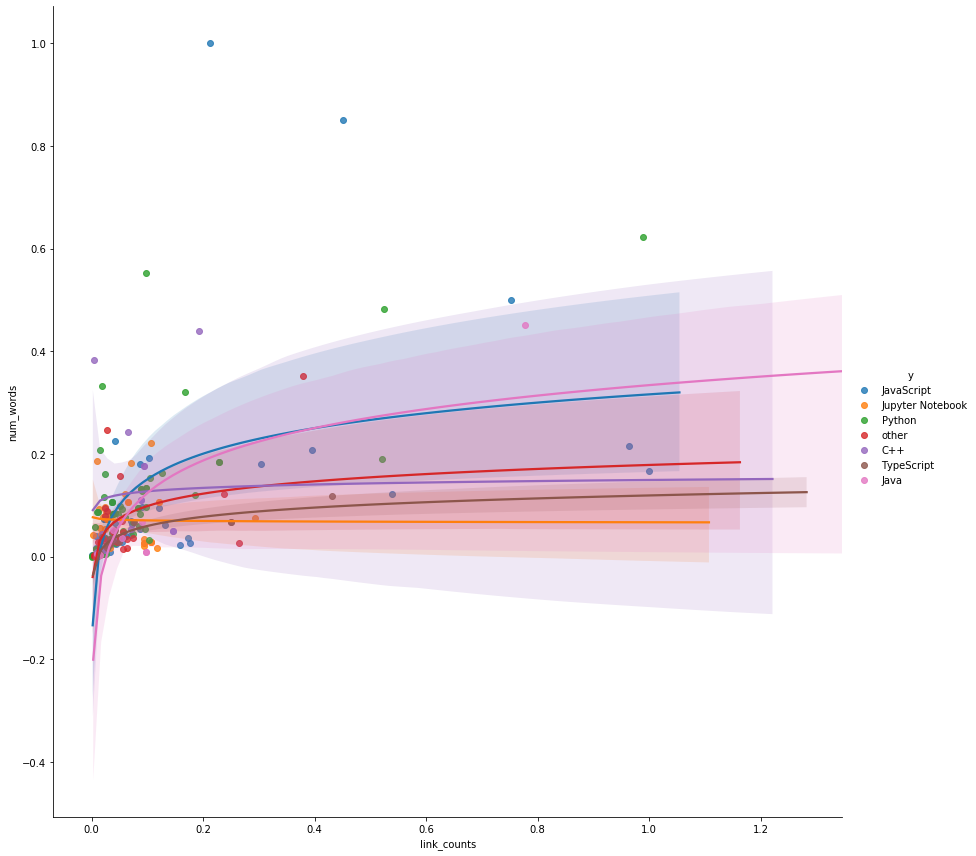

In [17]:
sns.lmplot(x='link_counts', y='num_words', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

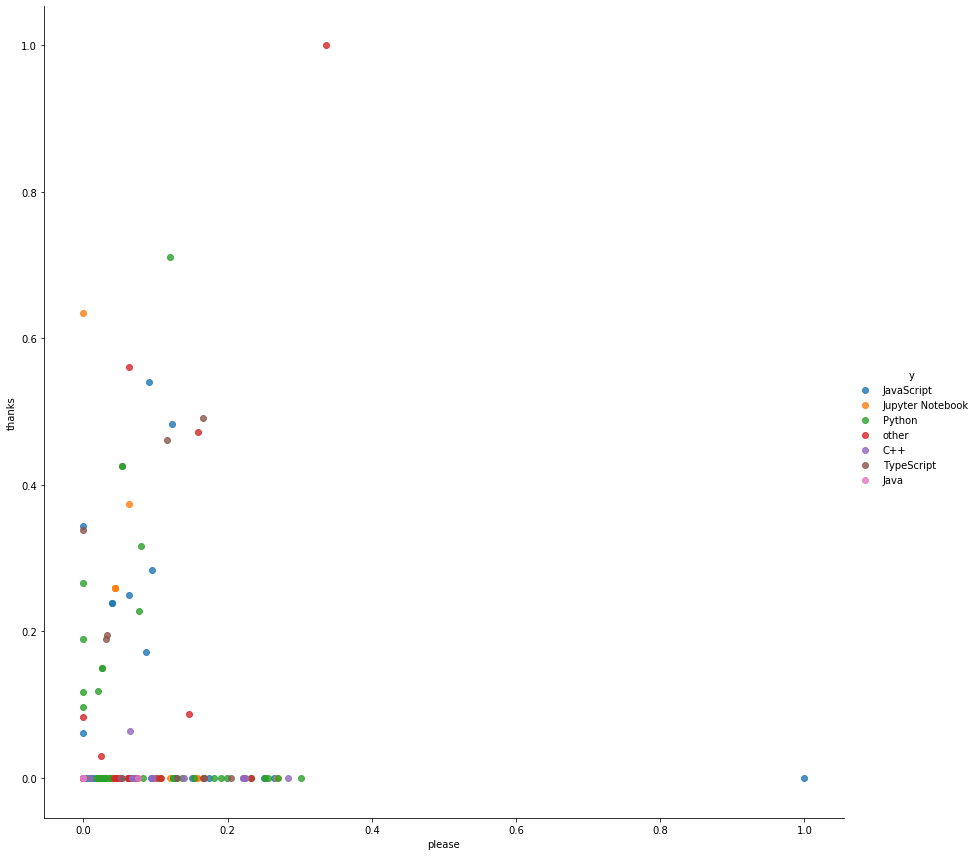

In [18]:
# visualize please & thanks
sns.lmplot(x='please', y='thanks', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

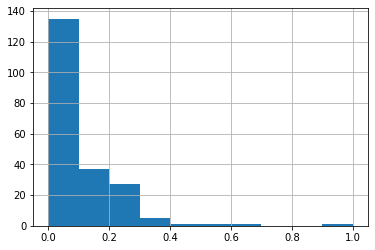

In [19]:
X_train_reduced.politeness.hist()

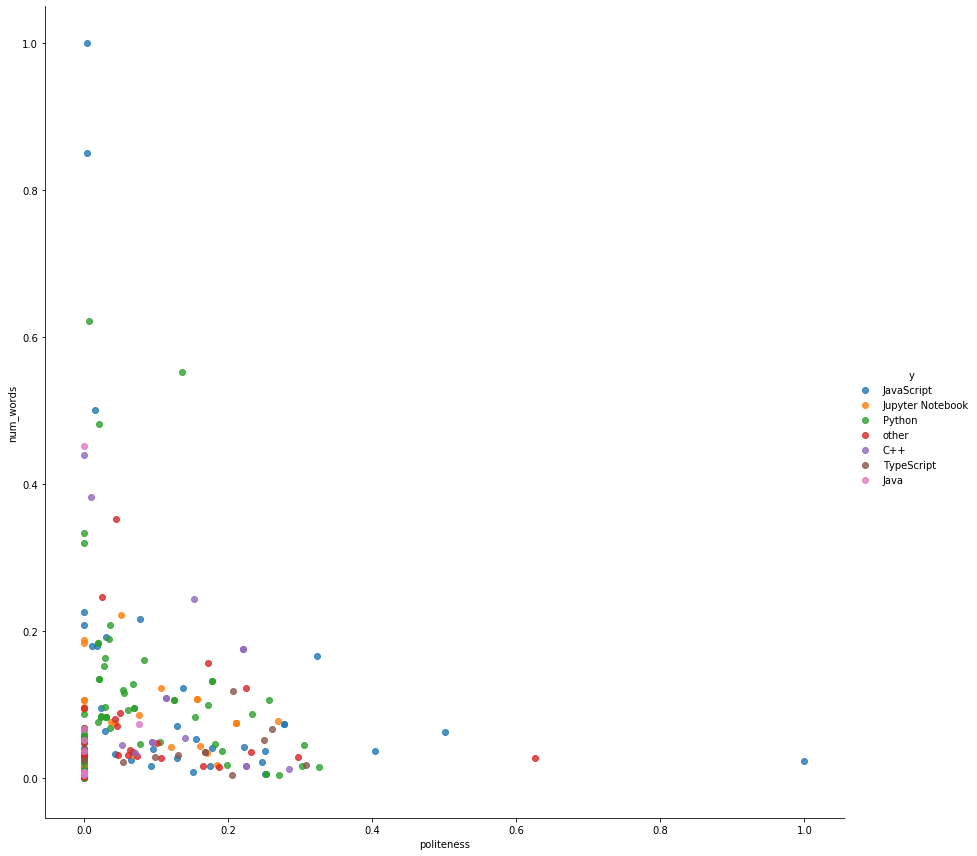

In [20]:
sns.lmplot(x='politeness', y='num_words', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

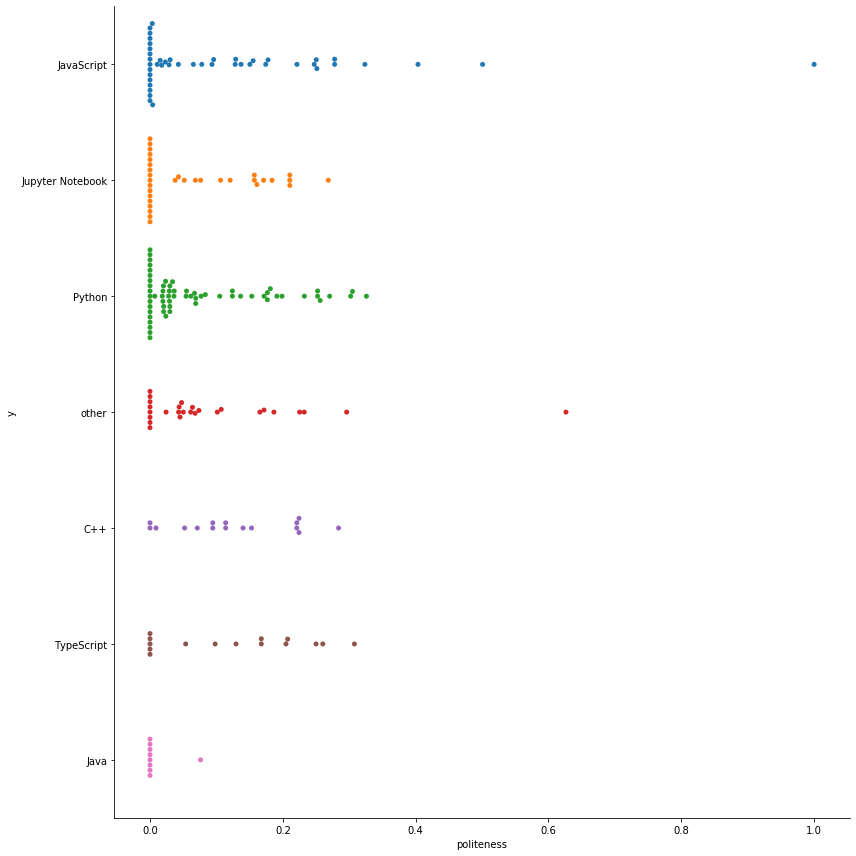

In [21]:
sns.catplot(y="y", x="politeness", kind="swarm", data=X_train_reduced, height=12)

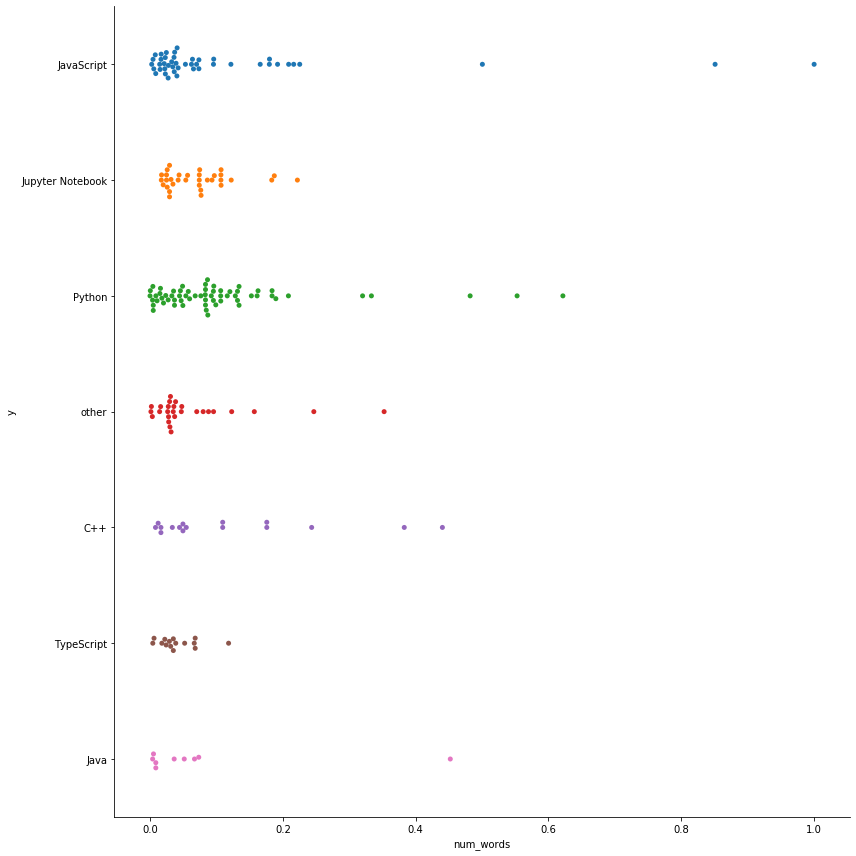

In [22]:
sns.catplot(y="y", x="num_words", kind="swarm", data=X_train_reduced, height=12)

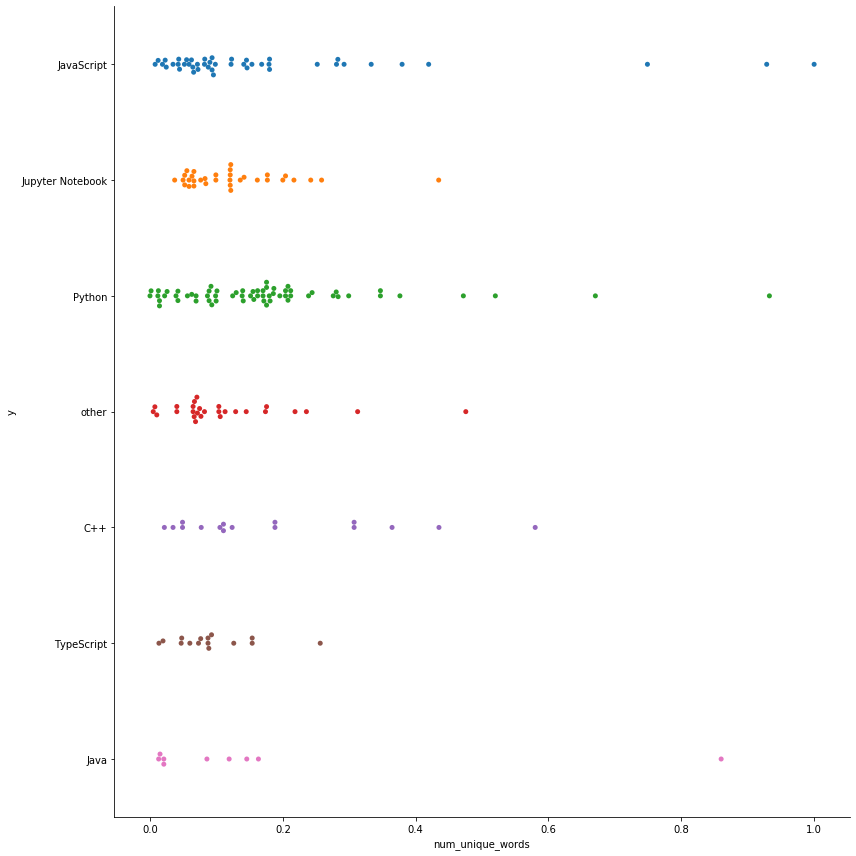

In [23]:
sns.catplot(y="y", x="num_unique_words", kind="swarm", data=X_train_reduced, height=12)

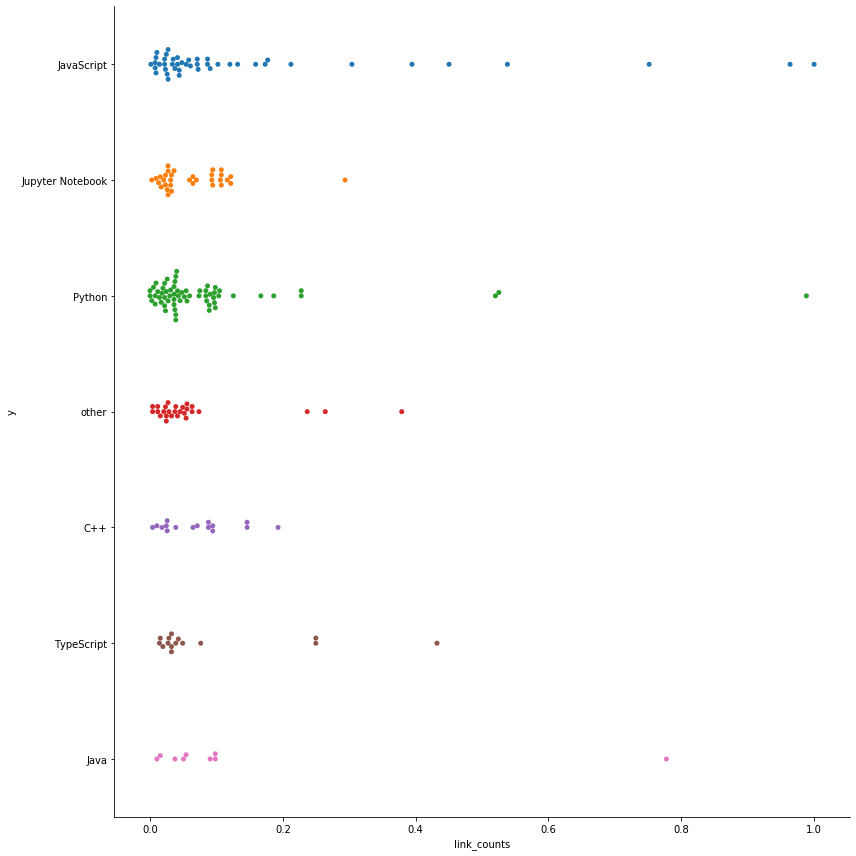

In [24]:
sns.catplot(y="y", x="link_counts", kind="swarm", data=X_train_reduced, height=12)

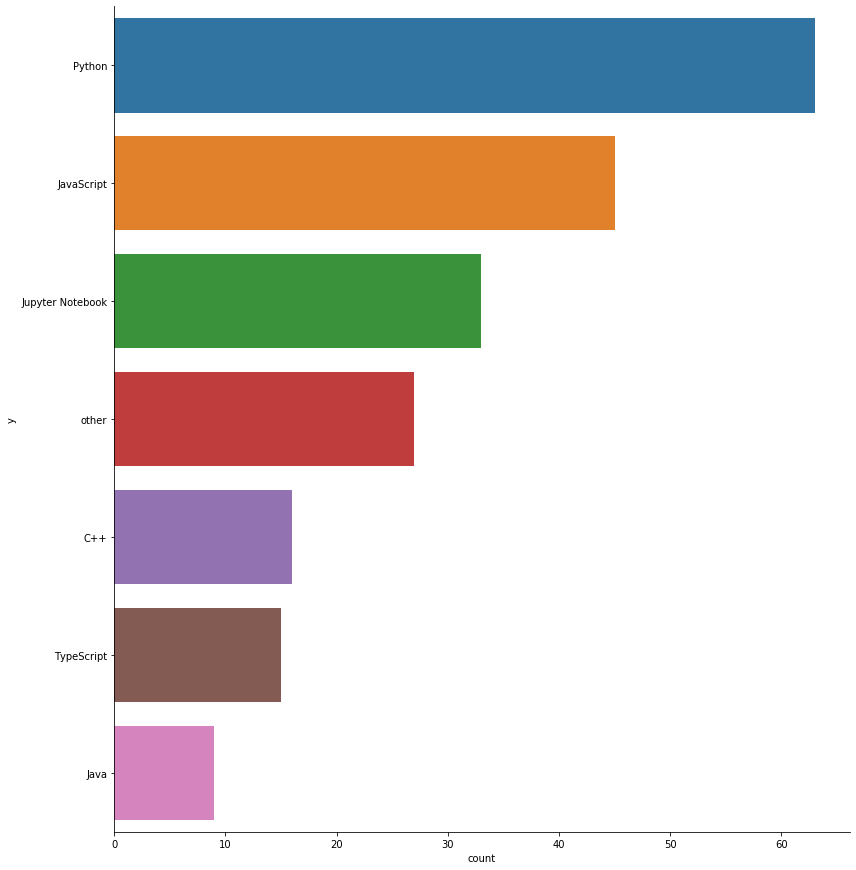

In [31]:
languages = ['Python', 'JavaScript', 'Jupyter Notebook', 'other', 'C++', 'TypeScript', 'Java']

sns.catplot(y='y', kind='count', data=X_train_reduced, height=12, order=languages)